# Data Analysis on Elite NBA Gaurds - Case Study

In this notebook, we take a close look at three top tier point gaurds in the NBA.

 - Stephen Curry 
 - Damian Lillard 
 - Chris Paul
 
Our goal is to decide which point gaurd impacts winning the most out of the three here. In order to come to a conclusion, let's take a  a deeper dive into the data and try to answer some of these following questions:

 - Which point gaurd has the highest Plus/Minus when playing highly efficient defensive teams?
 - How does each point gaurd  shoot the ball against the top shooting defense teams? 

Also, we will want to pay attention and note any new or interesting findings we may come across in this study. 
    
The data was extracted from basketball-reference.com and teamrankings.com, then compiled into an Excel spreadsheet. The spreadsheets contain each game log that the players played from the 2017-2018 season to the end of the 2020-2021 season. For those who are not very familiar with basketball statistics and wish to gain a better understanding of the features in the spreadsheet, please click here. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
Curry = pd.read_excel("Stephen_Curry.xlsx")
Lillard = pd.read_excel("Damian_Lillard.xlsx")
Paul = pd.read_excel("Chris_Paul.xlsx")

In [3]:
Curry.head(20)

,Rk,G,Date,Year,Age,Tm,Unnamed: 6,Opp,Unnamed: 8,GS,...,TOV,PF,PTS,GmSc,+/-,Postseason,Opp Def Eff,Opp TS,Opp TO per POS,Opp 3PT Made
0,1,1.0,2017-10-17,2017-2018,29-217,GSW,NaN,HOU,L (-1),1,...,2.0,4.0,22.0,14.3,9.0,0,1.032,1.098,0.144,10.2
1,2,2.0,2017-10-20,2017-2018,29-220,GSW,@,NOP,W (+8),1,...,1.0,1.0,28.0,24.7,7.0,0,1.053,1.086,0.137,10.8
2,3,3.0,2017-10-21,2017-2018,29-221,GSW,@,MEM,L (-10),1,...,2.0,5.0,37.0,28.6,-6.0,0,1.074,1.134,0.150,10.7
3,4,4.0,2017-10-23,2017-2018,29-223,GSW,@,DAL,W (+30),1,...,6.0,1.0,29.0,25.9,22.0,0,1.066,1.121,0.139,10.7
4,5,5.0,2017-10-25,2017-2018,29-225,GSW,NaN,TOR,W (+5),1,...,2.0,2.0,30.0,25.2,14.0,0,1.036,1.082,0.139,9.0
5,6,6.0,2017-10-27,2017-2018,29-227,GSW,NaN,WAS,W (+3),1,...,2.0,2.0,20.0,15.8,-8.0,0,1.056,1.113,0.148,10.2
6,7,7.0,2017-10-29,2017-2018,29-229,GSW,NaN,DET,L (-8),1,...,5.0,3.0,27.0,21.7,12.0,0,1.042,1.103,0.149,11.1
7,8,8.0,2017-10-30,2017-2018,29-230,GSW,@,LAC,W (+28),1,...,1.0,3.0,31.0,31.0,21.0,0,1.068,1.106,0.138,10.7
8,9,9.0,2017-11-02,2017-2018,29-233,GSW,@,SAS,W (+20),1,...,2.0,2.0,21.0,21.2,16.0,0,1.022,1.075,0.143,9.2
9,10,10.0,2017-11-04,2017-2018,29-235,GSW,@,DEN,W (+19),1,...,3.0,0.0,22.0,21.3,44.0,0,1.076,1.125,0.137,10.9


In [4]:
Curry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rk              344 non-null    int64         
 1   G               225 non-null    float64       
 2   Date            344 non-null    datetime64[ns]
 3   Year            344 non-null    object        
 4   Age             344 non-null    object        
 5   Tm              344 non-null    object        
 6   Unnamed: 6      170 non-null    object        
 7   Opp             344 non-null    object        
 8   Unnamed: 8      344 non-null    object        
 9   GS              344 non-null    object        
 10  MP              225 non-null    object        
 11  FG              225 non-null    float64       
 12  FGA             225 non-null    float64       
 13  FG%             225 non-null    float64       
 14  3P              225 non-null    float64       
 15  3PA   

### Data Cleaning

In [5]:
#let's clean up and filter the spreadsheets so we can work with them

data = [Curry, Lillard, Paul]

for i in data:
    i.drop(['Rk', 'G', 'Age', 'Unnamed: 6','MP'], axis=1, inplace=True)
    i=i.rename(columns={"Unnamed: 8": "Win_Loss","Tm":"Team_ID",'Date':'Date_ID',
                        '3P%':'3P_Percent', 'FG%':'FG_Percent','FT%':'FT_Percent',
                        'Opp Def Eff': 'Opp_Def_Eff', 'Opp TS': 'Opp_TS', 'Opp TO per POS':'Opp_TO_per_POS',
                       'Opp 3PT Made': 'Opp_3PT_Made'}, inplace=True)

for i in data:
    i['Win_Loss'] = i['Win_Loss'].astype(str)
    i[['Win_Loss','Differential']] = i['Win_Loss'].str.split('(',expand=True)
    i['Win_Loss'] = i['Win_Loss'].map(lambda x: x.strip('('))
    
    i['Differential'] = i['Differential'].map(lambda x: x.strip(')'))
    i['Differential'] = i['Differential'].map(lambda x: x.strip('+'))
    
    a = 'Differential'
    temp_col = i.pop(a)
    i.insert(5, a, temp_col)
    i['Differential'] = i['Differential'].astype(int)
    
    i['Win_Loss'] = i['Win_Loss'].replace('W',1)
    i['Win_Loss'] = i['Win_Loss'].replace('W ',1)
    i['Win_Loss'] = i['Win_Loss'].replace('L',0)
    i['Win_Loss'] = i['Win_Loss'].replace('L ',0)
    i['Win_Loss'] = i['Win_Loss'].astype(int)
    
Curry.insert(0, 'Player_ID', 'SC_30')
Lillard.insert(0, 'Player_ID', 'DL_0')
Paul.insert(0, 'Player_ID', 'CP_3')

In [6]:
Curry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Player_ID       344 non-null    object        
 1   Date_ID         344 non-null    datetime64[ns]
 2   Year            344 non-null    object        
 3   Team_ID         344 non-null    object        
 4   Opp             344 non-null    object        
 5   Win_Loss        344 non-null    int64         
 6   Differential    344 non-null    int64         
 7   GS              344 non-null    object        
 8   FG              225 non-null    float64       
 9   FGA             225 non-null    float64       
 10  FG_Percent      225 non-null    float64       
 11  3P              225 non-null    float64       
 12  3PA             225 non-null    float64       
 13  3P_Percent      224 non-null    float64       
 14  FT              225 non-null    float64       
 15  FTA   

In [7]:
Curry.head(20)

,Player_ID,Date_ID,Year,Team_ID,Opp,Win_Loss,Differential,GS,FG,FGA,...,TOV,PF,PTS,GmSc,+/-,Postseason,Opp_Def_Eff,Opp_TS,Opp_TO_per_POS,Opp_3PT_Made
0,SC_30,2017-10-17,2017-2018,GSW,HOU,0,-1,1,8.0,18.0,...,2.0,4.0,22.0,14.3,9.0,0,1.032,1.098,0.144,10.2
1,SC_30,2017-10-20,2017-2018,GSW,NOP,1,8,1,7.0,16.0,...,1.0,1.0,28.0,24.7,7.0,0,1.053,1.086,0.137,10.8
2,SC_30,2017-10-21,2017-2018,GSW,MEM,0,-10,1,9.0,17.0,...,2.0,5.0,37.0,28.6,-6.0,0,1.074,1.134,0.150,10.7
3,SC_30,2017-10-23,2017-2018,GSW,DAL,1,30,1,7.0,15.0,...,6.0,1.0,29.0,25.9,22.0,0,1.066,1.121,0.139,10.7
4,SC_30,2017-10-25,2017-2018,GSW,TOR,1,5,1,9.0,20.0,...,2.0,2.0,30.0,25.2,14.0,0,1.036,1.082,0.139,9.0
5,SC_30,2017-10-27,2017-2018,GSW,WAS,1,3,1,7.0,19.0,...,2.0,2.0,20.0,15.8,-8.0,0,1.056,1.113,0.148,10.2
6,SC_30,2017-10-29,2017-2018,GSW,DET,0,-8,1,11.0,17.0,...,5.0,3.0,27.0,21.7,12.0,0,1.042,1.103,0.149,11.1
7,SC_30,2017-10-30,2017-2018,GSW,LAC,1,28,1,9.0,14.0,...,1.0,3.0,31.0,31.0,21.0,0,1.068,1.106,0.138,10.7
8,SC_30,2017-11-02,2017-2018,GSW,SAS,1,20,1,7.0,13.0,...,2.0,2.0,21.0,21.2,16.0,0,1.022,1.075,0.143,9.2
9,SC_30,2017-11-04,2017-2018,GSW,DEN,1,19,1,7.0,14.0,...,3.0,0.0,22.0,21.3,44.0,0,1.076,1.125,0.137,10.9


In [8]:
Curry.shape

(344, 33)

In [9]:
#Number of rows with null values in Curry spreadsheet

Curry.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

sum(Curry.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

133

In [10]:
#Let's put all the three point gaurds into one dataframe so we can pull whatever data we want from it.

all_pg = new = pd.concat(data)

all_pg.head()

,Player_ID,Date_ID,Year,Team_ID,Opp,Win_Loss,Differential,GS,FG,FGA,...,TOV,PF,PTS,GmSc,+/-,Postseason,Opp_Def_Eff,Opp_TS,Opp_TO_per_POS,Opp_3PT_Made
0,SC_30,2017-10-17,2017-2018,GSW,HOU,0,-1,1,8.0,18.0,...,2.0,4.0,22.0,14.3,9.0,0,1.032,1.098,0.144,10.2
1,SC_30,2017-10-20,2017-2018,GSW,NOP,1,8,1,7.0,16.0,...,1.0,1.0,28.0,24.7,7.0,0,1.053,1.086,0.137,10.8
2,SC_30,2017-10-21,2017-2018,GSW,MEM,0,-10,1,9.0,17.0,...,2.0,5.0,37.0,28.6,-6.0,0,1.074,1.134,0.150,10.7
3,SC_30,2017-10-23,2017-2018,GSW,DAL,1,30,1,7.0,15.0,...,6.0,1.0,29.0,25.9,22.0,0,1.066,1.121,0.139,10.7
4,SC_30,2017-10-25,2017-2018,GSW,TOR,1,5,1,9.0,20.0,...,2.0,2.0,30.0,25.2,14.0,0,1.036,1.082,0.139,9.0


In [11]:
all_pg.shape

(1050, 33)

In [12]:
#Number of rows with null values in concat dataframe

all_pg.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

sum(all_pg.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

273

In [13]:
#drop the rows with null values, most likely indicating the player did not play in that game 

all_pg_2 = all_pg.dropna()
all_pg_2.shape

(777, 33)

### Question 1: Which point gaurd has the highest Plus/Minus when playing good defensive teams?

In [14]:
#Let's grab the columns we need to answer this question 

Q1 = all_pg_2[['Player_ID','+/-','Opp_Def_Eff']].copy()
Q1_filtered = Q1.query('Opp_Def_Eff <= 1.065')
Q1_filtered.head()

,Player_ID,+/-,Opp_Def_Eff
0,SC_30,9.0,1.032
1,SC_30,7.0,1.053
4,SC_30,14.0,1.036
5,SC_30,-8.0,1.056
6,SC_30,12.0,1.042


In [15]:
print('Opp_Def_Eff <= 1.065')
print('-----------------------------------')
print('\n')

print(Q1_filtered.groupby(["Player_ID"])['+/-'].mean())
print('\n')
print(Q1_filtered.groupby(["Player_ID"])['+/-'].median())

Opp_Def_Eff <= 1.065
-----------------------------------


Player_ID
CP_3     4.000000
DL_0     1.387097
SC_30    2.547945
Name: +/-, dtype: float64


Player_ID
CP_3     4.0
DL_0     2.0
SC_30    3.0
Name: +/-, dtype: float64


In [16]:
#Let's lower the Opponent Defensive Efficiency even more and see the performance against the most efficient defenses in the NBA

Q2_filtered = Q1.query('Opp_Def_Eff <= 1.030')

print('Opp_Def_Eff <= 1.030')
print('-----------------------------------')
print('\n')

print(Q2_filtered.groupby(["Player_ID"])['+/-'].mean())
print('\n')
print(Q2_filtered.groupby(["Player_ID"])['+/-'].median())

Opp_Def_Eff <= 1.030
-----------------------------------


Player_ID
CP_3     4.190476
DL_0    -1.529412
SC_30    1.363636
Name: +/-, dtype: float64


Player_ID
CP_3     8.0
DL_0     1.0
SC_30    3.0
Name: +/-, dtype: float64


Text(-33, 1.032, 'Defensive Efficiency < 1.031')

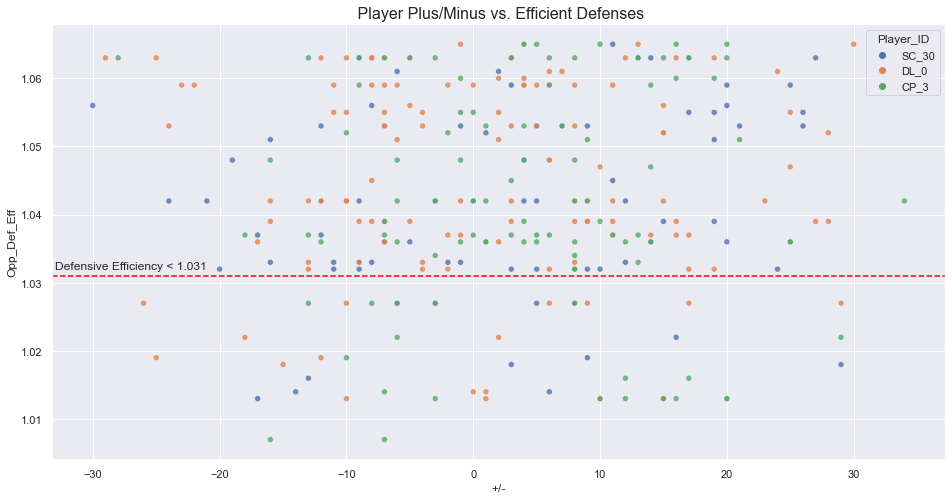

In [17]:
#Let's visualize the data

sns.set(rc={'figure.facecolor':'grey'})
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharex = True, sharey = True, figsize=(16,8))

Low_D = sns.scatterplot(data=Q1_filtered, x="+/-", y="Opp_Def_Eff", hue="Player_ID", alpha = 0.8)
Low_D.set_title(" Player Plus/Minus vs. Efficient Defenses", fontsize = 16)
Low_D.axhline(1.031, color = 'red', linestyle = '--')
plt.text(-33, 1.032, 'Defensive Efficiency < 1.031')


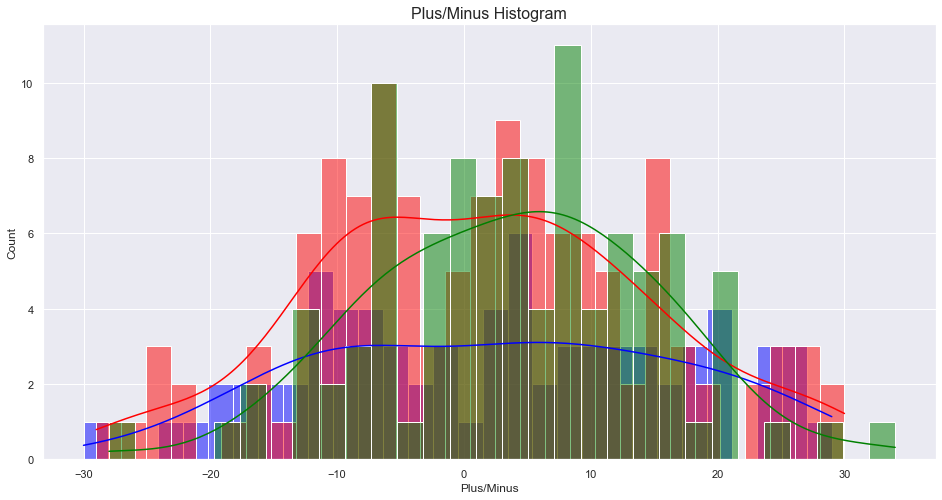

In [18]:
#Let's visualize this data 

fig, axes = plt.subplots(1, 1, sharex = True, sharey = True, figsize=(16,8))

Q3 = Q1[(Q1.Player_ID == 'SC_30') & (Q1.Opp_Def_Eff <= 1.065)]
Q3 = Q3.drop(['Opp_Def_Eff'], axis=1)

Q4 = Q1[(Q1.Player_ID == 'DL_0') & (Q1.Opp_Def_Eff <= 1.065)]
Q4 = Q4.drop(['Opp_Def_Eff'], axis=1)

Q5 = Q1[(Q1.Player_ID == 'CP_3') & (Q1.Opp_Def_Eff <= 1.065)]
Q5 = Q5.drop(['Opp_Def_Eff'], axis=1)

#Stephen Curry 

SC = sns.histplot(data=Q3, x='+/-', bins=30, color = 'blue', kde = True)

SC.set_xlabel("Plus/Minus", fontsize = 12)
SC.set_ylabel("Count", fontsize = 12)
SC.set_title("Plus/Minus Histogram", fontsize = 16)

#Damian Lillard

DL = sns.histplot(data=Q4, x='+/-', bins=30, color = 'red', kde = True)

#Chris Paul

CP = sns.histplot(data=Q5, x='+/-', bins=30, color = 'green', kde = True)

Text(0.5, 1.0, 'Chris Paul')

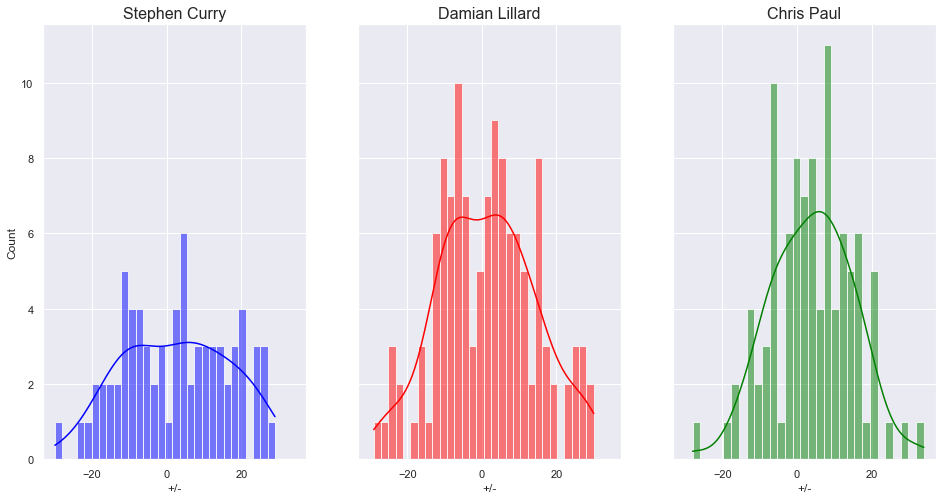

In [19]:
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(16,8))

#Stephen Curry 

SC = sns.histplot(ax=axes[0],data=Q3, x='+/-', bins=30, color = 'blue', kde = True)

SC.set_xlabel("+/-", fontsize = 12)
SC.set_ylabel("Count", fontsize = 12)
SC.set_title("Stephen Curry", fontsize = 16)

#Damian Lillard

DL = sns.histplot(ax=axes[1],data=Q4, x='+/-', bins=30, color = 'red', kde = True)
DL.set_title("Damian Lillard", fontsize = 16)

#Chris Paul

CP = sns.histplot(ax=axes[2],data=Q5, x='+/-', bins=30, color = 'green', kde = True)
CP.set_title("Chris Paul", fontsize = 16)

#### Analysis 

After taking a closer look, Chris Paul clearly is the most impactful player. Against highly efficient defenses in the NBA, Chris Paul has the highest average Plus Minus score than the other two point gaurds. Chris Paul's Plus/Minus is almost 2x greater than Steph Curry's and almost 4x greater than Dame Lillard. When we lower the opponent defensive efficiency to an even lower level, Chris Paul's plus increases from 4 to 4.19 as the other two gaurds take a drastic hit, with Steph dropping below 2 and Dame going into the negative.

 - CP3 has a Plus/Minus 4x greater than Dame, 2x greater than Steph
 
 
 - CP3 Plus/Minus increases as the defenses get better while the other two get worse 
 
 
 - CP3 is much more effective at reading the defenses, making plays for his teammates. Also, he is known as a better defender than the 2 which may increase his Plus/Minus by stopping the opposition from scoring on the defensive end. 

### Question 2: How does each point gaurd  shoot the ball against great shooting defense teams? 

In [20]:
#Let's grab the columns we need to answer this question 

Q2 = all_pg_2[['Player_ID','Postseason', 'FG', 'FGA','FG_Percent', 'FT', 'FTA', 
               'FT_Percent','3P','3PA','3P_Percent','PTS','+/-','Opp_TS','Opp_3PT_Made']].copy()

#Let's create a new column that calculates the True Shooting Percentage of each player in each game 

TSA = 2*(Q2['FGA']+0.44*Q2['FTA'])

Q2['TS_Percent']= Q2['PTS']/TSA

#Filter for great shooting defenses

Q6 = Q2.query('Opp_TS < 1.1')
Q7 = Q2.query('Opp_3PT_Made <= 11.99')

#Filter for playoff games only

Q2_filtered = Q2.query('Postseason == 1')

In [21]:
#Let's see the results

print("ALL GAMES")
print('------------------------------------------------------------')

print(Q2.groupby(["Player_ID"])['PTS'].mean())
print('\n')
print(Q2.groupby(["Player_ID"])['TS_Percent'].mean())
print('\n')
print(Q2.groupby(["Player_ID"])['3P_Percent'].mean())
print('\n')
print(Q2.groupby(["Player_ID"])['FG_Percent'].mean())
print('\n')


print("POSTSEASON ONLY")
print('------------------------------------------------------------')

print(Q2_filtered.groupby(["Player_ID"])['PTS'].mean())
print('\n')
print(Q2_filtered.groupby(["Player_ID"])['TS_Percent'].mean())
print('\n')
print(Q2_filtered.groupby(["Player_ID"])['3P_Percent'].mean())
print('\n')
print(Q2_filtered.groupby(["Player_ID"])['FG_Percent'].mean())
print('\n')


print("AGAINST ELITE 3PT DEFENSE")
print('------------------------------------------------------------')

print(Q7.groupby(["Player_ID"])['PTS'].mean())
print('\n')
print(Q7.groupby(["Player_ID"])['TS_Percent'].mean())
print('\n')
print(Q7.groupby(["Player_ID"])['3P_Percent'].mean())
print('\n')
print(Q7.groupby(["Player_ID"])['FG_Percent'].mean())
print('\n')


print("AGAINST ELITE OVERALL SHOOTING DEFENSE")
print('------------------------------------------------------------')

print(Q6.groupby(["Player_ID"])['PTS'].mean())
print('\n')
print(Q6.groupby(["Player_ID"])['TS_Percent'].mean())
print('\n')
print(Q6.groupby(["Player_ID"])['3P_Percent'].mean())
print('\n')
print(Q6.groupby(["Player_ID"])['FG_Percent'].mean())
print('\n')


ALL GAMES
------------------------------------------------------------
Player_ID
CP_3     18.467181
DL_0     27.918567
SC_30    28.872038
Name: PTS, dtype: float64


Player_ID
CP_3     0.595964
DL_0     0.602881
SC_30    0.643906
Name: TS_Percent, dtype: float64


Player_ID
CP_3     0.351274
DL_0     0.365625
SC_30    0.408796
Name: 3P_Percent, dtype: float64


Player_ID
CP_3     0.464498
DL_0     0.442678
SC_30    0.473621
Name: FG_Percent, dtype: float64


POSTSEASON ONLY
------------------------------------------------------------
Player_ID
CP_3     21.047619
DL_0     27.307692
SC_30    27.057143
Name: PTS, dtype: float64


Player_ID
CP_3     0.583800
DL_0     0.562116
SC_30    0.608768
Name: TS_Percent, dtype: float64


Player_ID
CP_3     0.375214
DL_0     0.356769
SC_30    0.379486
Name: 3P_Percent, dtype: float64


Player_ID
CP_3     0.471119
DL_0     0.402962
SC_30    0.444800
Name: FG_Percent, dtype: float64


AGAINST ELITE 3PT DEFENSE
------------------------------------------

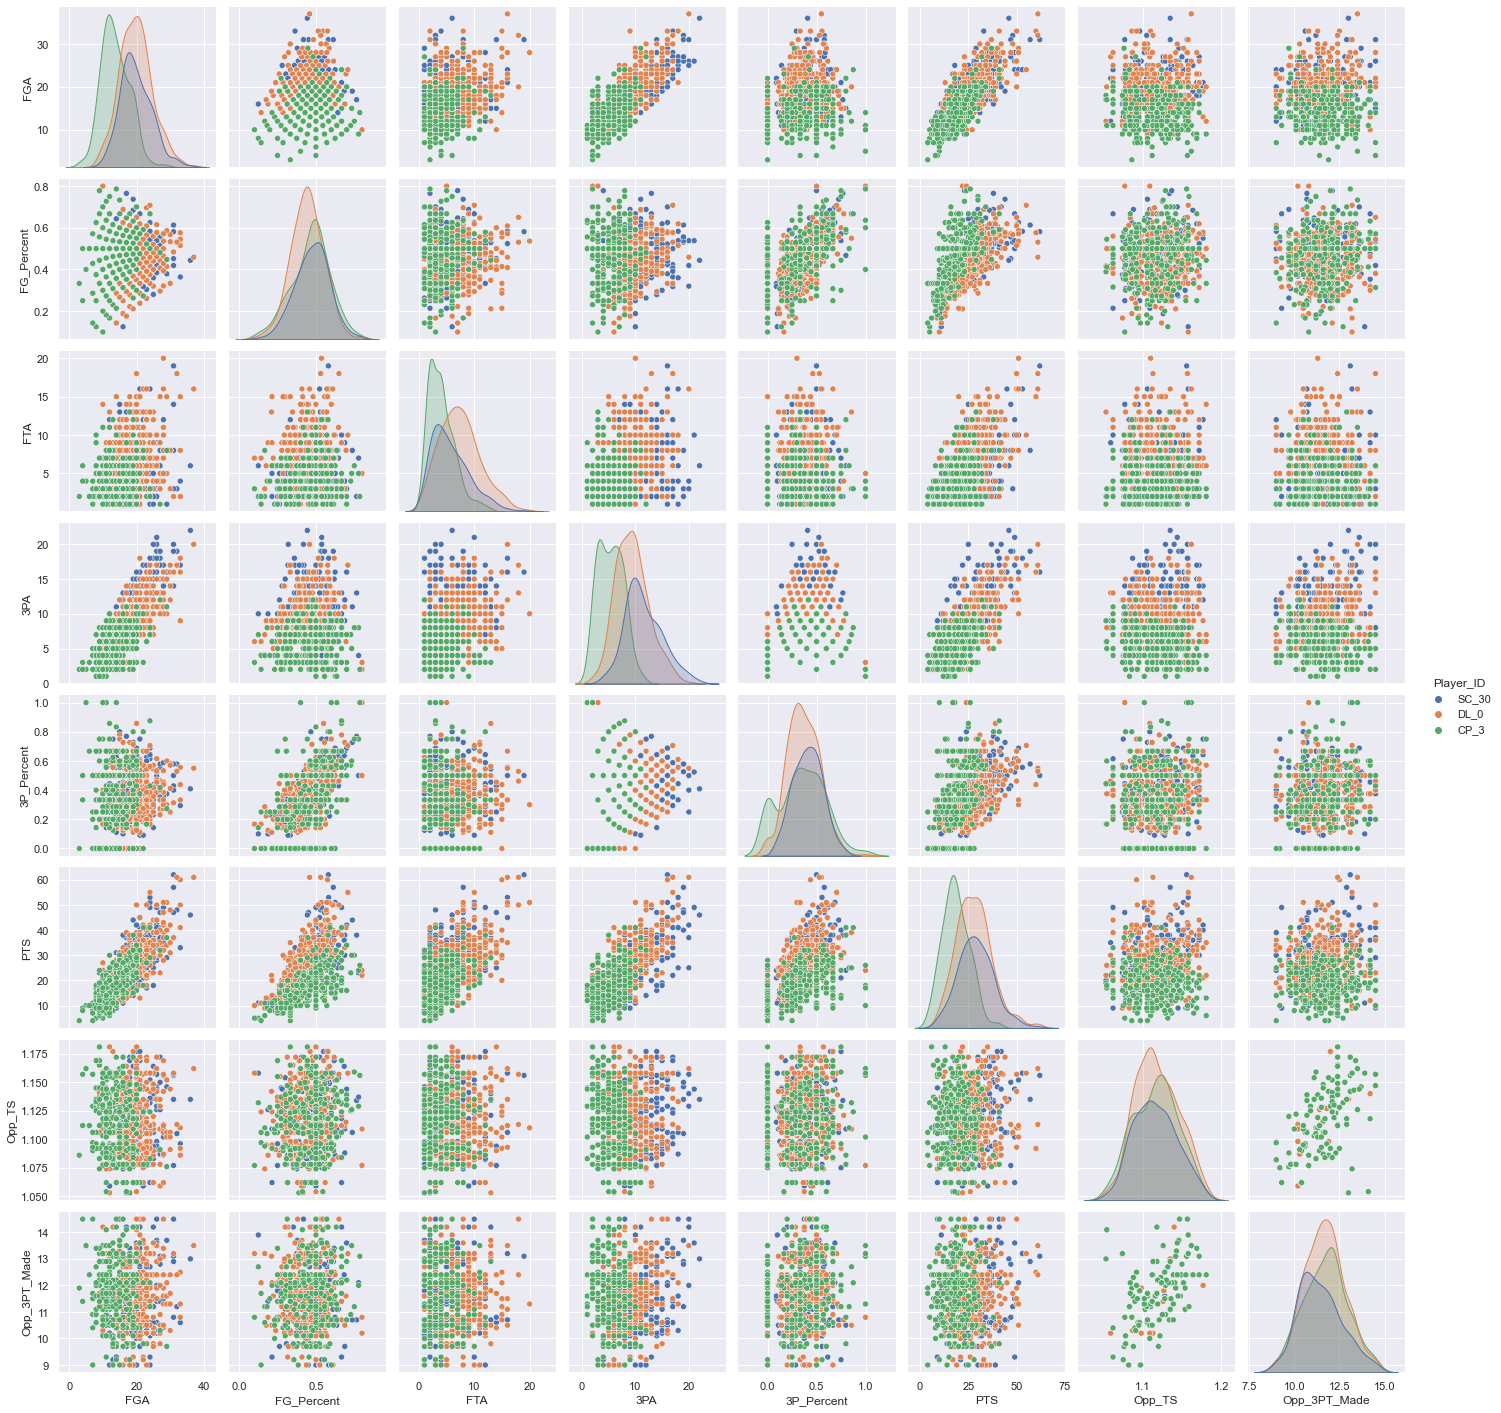

In [22]:
#Let's view a scatter plot matrix

Q10 = Q2[['Player_ID', 'FGA','FG_Percent','FTA', '3PA','3P_Percent','PTS','Opp_TS','Opp_3PT_Made']]

sns.pairplot(Q10, hue = "Player_ID")

#### Analysis 

In terms of shooting and scoring the basketball, Steph Curry and Dame Lillard shoot the ball better than Chris Paul against elite shooting defenses. Stephen Curry and Dame Lillard both have a higher TS_Percent and 3PT_Percent than Chris Paul, with Steph being a slighter better shooter than Dame in all categories. In terms of scoring, Dame and Steph are both over 25 PPG while CP3 is below 20 PPG for all games, however, CP3 does perform better in the playoffs than the 2.

 - CP3 shoots a mere 31% from three when playing great 3PT defensive teams while Dame and Steph shoot 36% and 39% respectively.
 
 
 - All players have a similar FG percentage against great overall shooting defenses with Dame being the worst at 43.5% and Chris Paul and Steph Curry being 44.5% and 44.1% respectively.
 
 
 - CP3 FG_Percent increases by 0.5% when playing in Postseason games while the other 2 gaurds decrease quite a bit, Dame drops by 4% and Steph drops by 3%.

### Limitations

- small/medium sample size 
- using mean data for the 4 opponent stats columns 
- missing some advanced stats like player offensive rating, usage rate, etc.